In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import csv

# Read In Data

In [2]:
df_BA=pd.read_csv('BA')
df_DS=pd.read_csv('DS')
df_DA=pd.read_csv('DA')
df_DE=pd.read_csv('DE')

In [3]:
df_DS

,JT,JD,tool_list,skill_list,degree_list,clean,lda_list,newlist
0,DS,The app has received high praise in the form o...,"['sql', 'linux', 'panda', 'sa', 'unix', 'table...","['research', 'data mining', 'dashboard', 'visu...",1.0,"['sql', 'linux', 'panda', 'sa', 'unix', 'table...","['analyt', 'machin', 'set', 'relat', 'sa', 'vi...","['sql', 'linux', 'panda', 'sa', 'unix', 'table..."
1,DS,You have 4+ years of experience as a Data Scie...,"['sql', 'numpi', 'panda', 'python', 'excel']","['research', 'commun', 'statist', 'logist', 'r...",999.0,"['sql', 'numpi', 'panda', 'python', 'excel', '...","['analyt', 'input', 'python', 'scientist', 'st...","['sql', 'numpi', 'panda', 'python', 'excel', '..."
2,DS,Job Brief\nThe ideal candidate will have previ...,"['sql', 'sa', 'python', 'r']","['research', 'classif', 'predict', 'regress', ...",1.0,"['sql', 'sa', 'python', 'r', 'research', 'clas...","['analyt', 'machin', 'techniqu', 'learn', 'rel...","['sql', 'sa', 'python', 'r', 'research', 'clas..."
3,DS,Backed by $153MM in venture funding from top i...,"['sql', 'kera', 'linux', 'numpi', 'panda', 'ju...","['research', 'data mining', 'machine learning'...",999.0,"['sql', 'kera', 'linux', 'numpi', 'panda', 'ju...","['machin', 'program', 'ml', 'corpor', 'line', ...","['sql', 'kera', 'linux', 'numpi', 'panda', 'ju..."
4,DS,"PulsePoint™, a global programmatic advertising...","['spark', 'numpi', 'panda', 'unix', 'hadoop', ...","['healthcar', 'bayesian', 'neural network', 's...",1.0,"['spark', 'numpi', 'panda', 'unix', 'hadoop', ...","['machin', 'learn', 'spark', 'ml', 'hadoop', '...","['spark', 'numpi', 'panda', 'unix', 'hadoop', ..."
...,...,...,...,...,...,...,...,...
968,DS,There is no shortage of computational and stat...,"['sql', 'python', 'spark', 'r']","['research', 'pipelin', 'risk', 'machine learn...",2.0,"['sql', 'python', 'spark', 'r', 'research', 'p...","['machin', 'program', 'techniqu', 'spark', 'ch...","['sql', 'python', 'spark', 'r', 'research', 'p..."
969,DS,Good understanding of machine learning and dat...,"['sql', 'aw', 'cloud', 'python', 'r', 'excel']","['research', 'natural language processing', 'd...",999.0,"['sql', 'aw', 'cloud', 'python', 'r', 'excel',...","['analyt', 'machin', 'program', 'techniqu', 'l...","['sql', 'aw', 'cloud', 'python', 'r', 'excel',..."
970,DS,You will collaborate with cross-functional tea...,"['sql', 'shini', 'tableau', 'python', 'r', 'ex...","['classif', 'visual', 'regress', 'machine lear...",1.0,"['sql', 'shini', 'tableau', 'python', 'r', 'ex...","['analyt', 'machin', 'techniqu', 'learn', 'ml'...","['sql', 'shini', 'tableau', 'python', 'r', 'ex..."
971,DS,The Business Planning and Analysis (BP&A) team...,"['sql', 'qlik', 'spark', 'sa', 'hadoop', 'tabl...","['recommend', 'research', 'visual', 'machine l...",1.0,"['sql', 'qlik', 'spark', 'sa', 'hadoop', 'tabl...","['day', 'analyt', 'machin', 'learn', 'spark', ...","['sql', 'qlik', 'spark', 'sa', 'hadoop', 'tabl..."


# Sample and Split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
len(df_DS),len(df_DA),len(df_BA),len(df_DE)

(973, 3983, 1663, 1167)

In [6]:
df_DA=df_DA.sample(n=1000)
df_BA=df_BA.sample(n=1000)

In [7]:
len(df_DS),len(df_DA),len(df_BA),len(df_DE)

(973, 1000, 1000, 1167)

In [8]:
whole_list=[df_DA,df_DS,df_DE,df_BA]
df_whole=pd.concat(whole_list)

In [9]:
df_whole

,JT,JD,tool_list,skill_list,degree_list,clean,lda_list,newlist
3435,DA,Position Purpose:\nInterpret and analyze data ...,"['sql', 'sa', 'hadoop', 'tableau', 'python', '...","['healthcar', 'data mining', 'dashboard', 'bio...",1.0,"['sql', 'sa', 'hadoop', 'tableau', 'python', '...","['analyt', 'machin', 'techniqu', 'relat', 'sa'...","['sql', 'sa', 'hadoop', 'tableau', 'python', '..."
1000,DA,This role is a key team player position in a c...,"['excel', 'microsoft']",[None],1.0,"['excel', 'microsoft']","['essenti', 'program', 'judgment', 'primari', ...","['excel', 'microsoft', 'essenti', 'program', '..."
2121,DA,"BA Systems/Data AnalystLocation: McLean, VADur...","['sql', 'jira']","['commun', 'risk']",1.0,"['sql', 'jira', 'commun', 'risk']","['basi', 'warehous', 'action']","['sql', 'jira', 'commun', 'risk', 'basi', 'war..."
3828,DA,Title: Data Analyst with R & sql\nContract Pos...,"['sql', 'aw', 'r']",['commun'],999.0,"['sql', 'aw', 'r', 'commun']","['basi', 'aw', 'analyt', 'evalu']","['sql', 'aw', 'r', 'commun', 'basi', 'aw', 'an..."
2611,DA,"About Porter-LeathFor more than 160 years, Por...",['excel'],"['research', 'dashboard', 'normal', 'problem s...",1.0,"['excel', 'research', 'dashboard', 'normal', '...","['analyt', 'essenti', 'program', 'techniqu', '...","['excel', 'research', 'dashboard', 'normal', '..."
...,...,...,...,...,...,...,...,...
891,BA,Conducts various types of research and analysi...,"['excel', 'ms office']","['research', 'supervis', 'commun', 'segment']",1.0,"['excel', 'microsoft', 'research', 'supervis',...","['analyt', 'line', 'judgment', 'engin', 'evalu']","['excel', 'microsoft', 'research', 'supervis',..."
458,BA,Business Analyst\nPosition Summary\nI. ID\nBus...,"['excel', 'unix']","['recommend', 'optim', 'problem solving', 'inf...",999.0,"['excel', 'unix', 'recommend', 'optim', 'probl...","['analyt', 'program', 'corpor', 'provid', 'opt...","['excel', 'unix', 'recommend', 'optim', 'probl..."
790,BA,You will be a key contributor on the consultin...,[None],['recommend'],2.0,['recommend'],[None],"['recommend', None]"
1009,BA,Client: FrontierBPM\nJob Title: Pegasystems Bu...,['excel'],"['supervis', 'commun', 'account']",1.0,"['excel', 'supervis', 'commun', 'account']","['clinic', 'engin', 'â', 'primari']","['excel', 'supervis', 'commun', 'account', 'cl..."


# Models

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [11]:
def evaluate_model(df,best,rf=False):
    df_train, df_test = train_test_split(df, test_size = 0.3)
    clean_train=df_train["newlist"]
    Y_train=df_train["NEWJT"]
    clean_test=df_test["newlist"]
    Y_test=df_test["NEWJT"]

    vectorizer = CountVectorizer().fit(df["newlist"])
    clean_bow= vectorizer.transform(df["newlist"])
    train_bow = vectorizer.transform(clean_train)
    test_bow = vectorizer.transform(clean_test)
    parameter=vectorizer.get_feature_names()
    
    tfidf_transformer = TfidfTransformer().fit(clean_bow)
    X_train = tfidf_transformer.transform(train_bow)
    X_test = tfidf_transformer.transform(test_bow)
    
    best.fit(X_train, Y_train)
    predictions1 = best.predict(X_test)
    print(classification_report(Y_test,predictions1))
    if rf:
        importances =best.feature_importances_
        forest_importances = pd.Series(importances,index=parameter)
        forest_importances=forest_importances.sort_values(ascending=False)[0:10]
        ax=forest_importances.plot.barh(x='lab', y='val')
        ax.invert_yaxis()
    return forest_importances

In [12]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [13]:
def encoding(name):
    df = pd.DataFrame()
    whole_list=[df_DA,df_DS,df_DE,df_BA]
    for i in whole_list:
        name1=get_df_name(i)
        if name1.split("_")[1]!=name:
            i_copy=i.sample(n=340)
        else:
            i_copy=i.copy()
        df=pd.concat([df,i_copy],ignore_index=True)
    df["NEWJT"]= np.where(df["JT"]==name,"1","0")
    return df

### Rf for each JT

In [14]:
def feature_extra(series):
    result=[]
    feature=series.index
    for word in feature:
        result.append(word)
    return result

In [15]:
BA_model = encoding('BA')
DE_model = encoding('DE')
DS_model = encoding('DS')
DA_model = encoding('DA')

In [16]:
rf = RandomForestClassifier(n_estimators=10)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       289
           1       0.88      0.86      0.87       317

    accuracy                           0.86       606
   macro avg       0.86      0.86      0.86       606
weighted avg       0.86      0.86      0.86       606



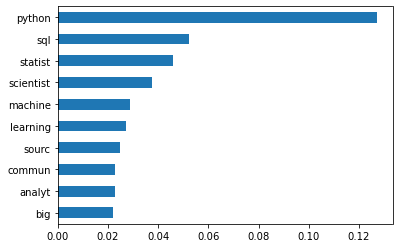

In [17]:
BA_Feature=evaluate_model(BA_model,rf,rf=True)

In [18]:
BA_feature=feature_extra(BA_Feature)
BA_feature

['python',
 'sql',
 'statist',
 'scientist',
 'machine',
 'learning',
 'sourc',
 'commun',
 'analyt',
 'big']

              precision    recall  f1-score   support

           0       0.75      0.83      0.78       299
           1       0.81      0.73      0.77       307

    accuracy                           0.78       606
   macro avg       0.78      0.78      0.78       606
weighted avg       0.78      0.78      0.78       606



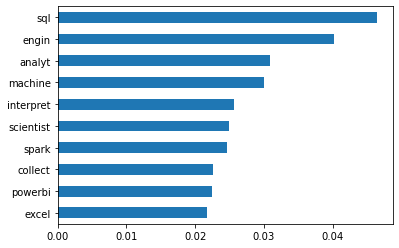

In [19]:
DA_Feature=evaluate_model(DA_model,rf,rf=True)
DA_feature=feature_extra(DA_Feature)

In [20]:
DA_feature

['sql',
 'engin',
 'analyt',
 'machine',
 'interpret',
 'scientist',
 'spark',
 'collect',
 'powerbi',
 'excel']

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       314
           1       0.91      0.86      0.89       284

    accuracy                           0.90       598
   macro avg       0.90      0.89      0.90       598
weighted avg       0.90      0.90      0.90       598



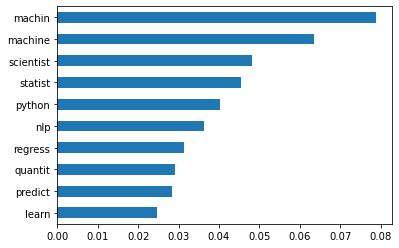

In [21]:
DS_Feature=evaluate_model(DS_model,rf,rf=True)
DS_feature=feature_extra(DS_Feature)

In [22]:
DS_feature

['machin',
 'machine',
 'scientist',
 'statist',
 'python',
 'nlp',
 'regress',
 'quantit',
 'predict',
 'learn']

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       289
           1       0.91      0.86      0.89       368

    accuracy                           0.88       657
   macro avg       0.87      0.88      0.88       657
weighted avg       0.88      0.88      0.88       657



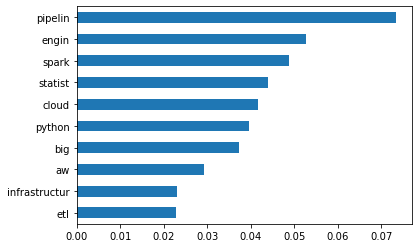

In [23]:
DE_Feature=evaluate_model(DE_model,rf,rf=True)
DE_feature=feature_extra(DE_Feature)

In [24]:
DE_feature

['pipelin',
 'engin',
 'spark',
 'statist',
 'cloud',
 'python',
 'big',
 'aw',
 'infrastructur',
 'etl']

In [25]:
with open('Feature_List', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(BA_feature)
    write.writerow(DA_feature)
    write.writerow(DS_feature)
    write.writerow(DE_feature)